In [1]:
from unimol_tools import MolPredict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2024-11-14 15:19:37 | unimol_tools/weights/weighthub.py | 17 | INFO | Uni-Mol Tools | Weights will be downloaded to default directory: /scratch/midway3/jshe/.conda/envs/unimol/lib/python3.10/site-packages/unimol_tools/weights


In [2]:
transform = 'log_standardize_prefix'

data_path = f'../../data/{transform}/test.csv'
model_path = f'./train/{transform}'

In [3]:
data = pd.read_csv(data_path)

In [4]:
clf = MolPredict(load_model=model_path)
preds = clf.predict(data=data_path)

2024-11-14 15:19:40 | unimol_tools/data/conformer.py | 89 | INFO | Uni-Mol Tools | Start generating conformers...
356it [00:16, 21.44it/s] 
2024-11-14 15:19:57 | unimol_tools/data/conformer.py | 93 | INFO | Uni-Mol Tools | Succeed to generate conformers for 100.00% of molecules.
2024-11-14 15:19:57 | unimol_tools/data/conformer.py | 95 | INFO | Uni-Mol Tools | Succeed to generate 3d conformers for 99.72% of molecules.
2024-11-14 15:19:57 | unimol_tools/models/unimol.py | 120 | INFO | Uni-Mol Tools | Loading pretrained weights from /scratch/midway3/jshe/.conda/envs/unimol/lib/python3.10/site-packages/unimol_tools/weights/mol_pre_all_h_220816.pt
2024-11-14 15:19:58 | unimol_tools/models/nnmodel.py | 206 | INFO | Uni-Mol Tools | start predict NNModel:unimolv1
2024-11-14 15:19:59 | unimol_tools/tasks/trainer.py | 300 | INFO | Uni-Mol Tools | load model success!
2024-11-14 15:20:09 | unimol_tools/tasks/trainer.py | 300 | INFO | Uni-Mol Tools | load model success!
2024-11-14 15:20:18 | unimo

In [5]:
for i in range(7):
    y_true = data.iloc[:, i+1]
    y_pred = preds[:, i]

    res = ((y_true - y_pred) ** 2).sum()
    tot = ((y_true - y_true.mean()) ** 2).sum()
    r2 = 1 - (res/tot)

    print(data.columns[i+1], f'\tR^2: {r2}')

property_LPS_Abs
	R^2: 0.05586079603164429
	MSE: 0.8321501888428651
property_LPS_Lum
	R^2: 0.11682700496882437
	MSE: 0.9818489893861936
property_MPLA_Abs
	R^2: 0.04491295275347784
	MSE: 0.6813967448691123
property_MPLA_Lum
	R^2: 0.05372514107495474
	MSE: 0.6471347575599937
property_CpG_Abs
	R^2: 0.043128142169929884
	MSE: 0.6957720142775038
property_cGAMP_Abs
	R^2: 0.043973395519358194
	MSE: 0.6861678950723141
property_cGAMP_Lum
	R^2: 0.059376822658374406
	MSE: 1.0694983382374477


Text(0.5, 0, 'property_cGAMP_Lum')

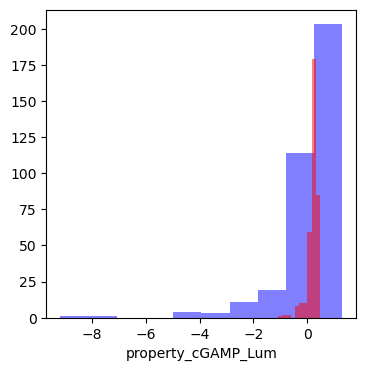

In [8]:
fig, ax0 = plt.subplots(figsize=(4, 4))

ax0.hist(data.iloc[:, -1], alpha=0.5, color='b')
ax0.hist(preds[:, -1], alpha=0.5, color='r')
ax0.set_xlabel(data.columns[-1])

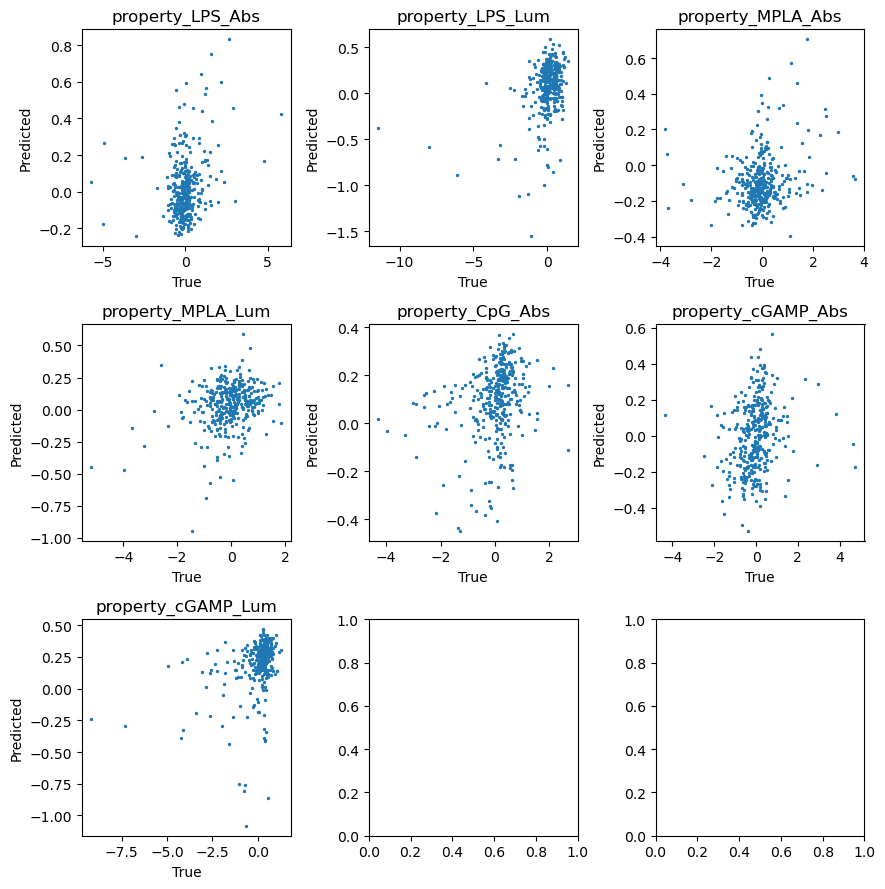

In [9]:
fig, axs = plt.subplots(3, 3, figsize=(9, 9))
axs = axs.flatten()

for i, property_label in enumerate(data.columns[1:]):

    ax = axs[i]

    ax.scatter(data.iloc[:, i+1], preds[:, i], s=2)
    ax.set_xlabel('True')
    ax.set_ylabel('Predicted')
    ax.set_title(property_label)

plt.tight_layout()

In [10]:
fig.savefig('predictions.pdf')